# EDA FOR KARIMGANJ_CLIMATE DATA

In [1]:
# importing dependencies
import pandas as pd
from scipy import stats
import numpy
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import seaborn as sns
%matplotlib inline
import datetime
import plotly
import plotly.graph_objs as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.colors as pc
import sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
print("Platform:", sys.platform)
print("Python version:", sys.version)
print("---")
print("matplotlib version:", matplotlib.__version__)
print("pandas version:", pd.__version__)
print("numpy version:", numpy.__version__)
print("seaborn version:", seaborn.__version__)
print("plotly version:", plotly.__version__)
print("scipy version:", scipy.__version__)

Platform: linux
Python version: 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
---
matplotlib version: 3.10.0
pandas version: 2.2.2
numpy version: 1.26.4
seaborn version: 0.13.2
plotly version: 5.24.1
scipy version: 1.13.1


In [4]:
df = pd.read_csv('/content/AllData_B4_EDA.csv', index_col='Date', parse_dates=True) # Read csv Data
print(df.shape)
df.head()

(3654, 19)


,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),rain_sum (mm),precipitation_hours (h),wind_speed_10m_max (m/s),wind_gusts_10m_max (m/s),wind_direction_10m_dominant (°),et0_fao_evapotranspiration (mm),unknown_discharge (m³/s),Kushi_discharge (m³/s),Longai_discharge (m³/s),Singla_discharge (m³/s),pressure_msl (hPa),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),flooded
Date,,,,,,,,,,,,,,,,,,,
2015-01-01,26.5,18.6,22.3,1.2,7,1.43,3.8,65,1.73,477.63,646.14,46.64,2.37,1015.7,0.244,0.279,0.319,0.456,0
2015-01-02,27.6,18.3,22.5,0.0,0,1.88,5.0,28,2.76,475.43,643.17,46.42,2.36,1015.9,0.249,0.279,0.319,0.455,0
2015-01-03,27.5,17.9,22.9,0.0,0,1.96,4.6,22,2.69,474.34,640.21,46.21,2.34,1014.7,0.248,0.279,0.318,0.455,0
2015-01-04,25.2,18.7,21.3,4.7,8,3.24,7.6,285,2.21,466.74,598.79,46.21,2.33,1012.5,0.277,0.279,0.318,0.455,0
2015-01-05,22.7,13.7,18.3,0.2,2,3.28,8.4,293,2.37,465.66,574.44,46.10,2.33,1013.1,0.321,0.279,0.318,0.454,0


# DESCRIPTIVE Analysis

In [5]:
print(df.shape)
df.info()

(3654, 19)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3654 entries, 2015-01-01 to 2025-01-01
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   temperature_2m_max (°C)             3654 non-null   float64
 1   temperature_2m_min (°C)             3654 non-null   float64
 2   temperature_2m_mean (°C)            3654 non-null   float64
 3   rain_sum (mm)                       3654 non-null   float64
 4   precipitation_hours (h)             3654 non-null   int64  
 5   wind_speed_10m_max (m/s)            3654 non-null   float64
 6   wind_gusts_10m_max (m/s)            3654 non-null   float64
 7   wind_direction_10m_dominant (°)     3654 non-null   int64  
 8   et0_fao_evapotranspiration (mm)     3654 non-null   float64
 9   unknown_discharge (m³/s)            3654 non-null   float64
 10  Kushi_discharge (m³/s)              3654 non-null   float64
 11  Longai_dischar

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2m_max (°C),3654.0,29.057608,3.295531,18.400,26.80000,29.6000,31.500,37.400
temperature_2m_min (°C),3654.0,20.290011,4.989983,8.300,15.80000,21.7000,24.800,28.600
temperature_2m_mean (°C),3654.0,24.220662,3.958377,13.500,21.00000,25.4000,27.400,32.000
rain_sum (mm),3654.0,9.425698,16.915257,0.000,0.00000,1.7000,12.600,193.100
precipitation_hours (h),3654.0,7.788451,8.283795,0.000,0.00000,5.0000,15.000,24.000
wind_speed_10m_max (m/s),3654.0,2.803503,0.921590,0.920,2.20000,2.5600,3.200,10.120
wind_gusts_10m_max (m/s),3654.0,6.740887,2.453858,3.000,4.80000,6.1000,8.100,20.500
wind_direction_10m_dominant (°),3654.0,128.991516,105.244328,0.000,46.00000,86.0000,207.000,360.000
et0_fao_evapotranspiration (mm),3654.0,3.183656,1.017729,0.440,2.51000,3.1150,3.850,6.930
unknown_discharge (m³/s),3654.0,1018.786582,675.769568,20.430,470.25000,738.6100,1398.590,4527.970


In [9]:
df.isna().any()

,0
temperature_2m_max (°C),False
temperature_2m_min (°C),False
temperature_2m_mean (°C),False
rain_sum (mm),False
precipitation_hours (h),False
wind_speed_10m_max (m/s),False
wind_gusts_10m_max (m/s),False
wind_direction_10m_dominant (°),False
et0_fao_evapotranspiration (mm),False
unknown_discharge (m³/s),False


In [10]:
df.duplicated().any()

False

In [7]:
len(df.select_dtypes(include=['float64']).columns)

16

In [8]:
len(df.select_dtypes(include=['number']).columns)

19

## OUTLIERS DETECTION

In [11]:
# Detecting outliers using IQR (Interquartile Range)
numeric_data = df.select_dtypes(include=['number'])

# Calculate the first and third quartile
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Detect outliers
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).sum()

print(outliers.T)

temperature_2m_max (°C)                 8
temperature_2m_min (°C)                 0
temperature_2m_mean (°C)                0
rain_sum (mm)                         277
precipitation_hours (h)                 0
wind_speed_10m_max (m/s)              161
wind_gusts_10m_max (m/s)               79
wind_direction_10m_dominant (°)         0
et0_fao_evapotranspiration (mm)        12
unknown_discharge (m³/s)               80
Kushi_discharge (m³/s)                 44
Longai_discharge (m³/s)                42
Singla_discharge (m³/s)                26
pressure_msl (hPa)                      0
soil_moisture_0_to_7cm (m³/m³)          0
soil_moisture_7_to_28cm (m³/m³)         0
soil_moisture_28_to_100cm (m³/m³)       0
soil_moisture_100_to_255cm (m³/m³)      0
flooded                               457
dtype: int64


rain_sum (mm): 277 outliers - This indicates a significant number of days with unusually high rainfall amounts. This is expected in climate data, as rainfall can vary greatly.
flooded: 214 outliers - This suggests a considerable number of days classified as "flooded," which are likely associated with extreme rainfall events.
wind_speed_10m_max (m/s): 161 outliers - A substantial number of days had exceptionally high maximum wind speeds. This could be due to storms or other weather patterns.
wind_gusts_10m_max (m/s): 79 outliers - A notable number of days experienced very strong wind gusts. These are often associated with severe weather.
unknown_discharge (m³/s): 80 outliers - This feature, representing discharge from an unknown source, has a considerable number of outliers, indicating potential variability in water flow.
Kushi_discharge (m³/s): 44 outliers - Discharge from the Kushi river shows a moderate number of outlier days, possibly due to fluctuating water levels.
Longai_discharge (m³/s): 42 outliers - Similar to the Kushi river, the Longai river discharge also has a moderate number of outlier days.
Singla_discharge (m³/s): 26 outliers - The Singla river discharge exhibits fewer outlier days compared to the other rivers.
temperature_2m_max (°C): 8 outliers - A relatively small number of days had unusually high maximum temperatures.
et0_fao_evapotranspiration (mm): 12 outliers - This indicates some days with unusually high evapotranspiration rates, possibly influenced by temperature, wind, or solar radiation.

Outlier Result Interpretation

In [12]:
# Calculate skewness for all numerical columns
skewness = df.select_dtypes(include=['number']).skew()

# Display the skewness values
print(skewness)

temperature_2m_max (°C)              -0.461317
temperature_2m_min (°C)              -0.544052
temperature_2m_mean (°C)             -0.575264
rain_sum (mm)                         3.763007
precipitation_hours (h)               0.595463
wind_speed_10m_max (m/s)              1.796237
wind_gusts_10m_max (m/s)              1.259856
wind_direction_10m_dominant (°)       0.821181
et0_fao_evapotranspiration (mm)       0.142698
unknown_discharge (m³/s)              1.219477
Kushi_discharge (m³/s)                1.062425
Longai_discharge (m³/s)               4.194884
Singla_discharge (m³/s)               1.082289
pressure_msl (hPa)                   -0.193027
soil_moisture_0_to_7cm (m³/m³)       -0.582044
soil_moisture_7_to_28cm (m³/m³)      -0.574779
soil_moisture_28_to_100cm (m³/m³)    -0.602612
soil_moisture_100_to_255cm (m³/m³)   -0.491933
flooded                               2.267772
dtype: float64


Skewness Result interpretation

Highly Positively Skewed (Skewness > 1):

rain_sum (mm) (3.763007): Rainfall data is often positively skewed. This means there are more days with lower rainfall amounts and fewer days with very high rainfall.
wind_speed_10m_max (m/s) (1.796237): Wind speed is also frequently positively skewed, with more days having moderate wind speeds and fewer days with very high wind speeds.
wind_gusts_10m_max (m/s) (1.259856): Similar to wind speed, wind gusts tend to be positively skewed.
unknown_discharge (m³/s) (1.219477): Discharge data often exhibits positive skewness due to occasional high flow events.
Kushi_discharge (m³/s) (1.062425): River discharge data can be positively skewed, suggesting more frequent low discharge values and fewer high discharge events.
Longai_discharge (m³/s) (4.194884): This has the highest positive skewness, indicating a strong right skew and potential for extreme discharge events.
Singla_discharge (m³/s) (1.082289): Similar to Kushi and Longai, this river discharge also shows positive skewness.
flooded (3.761461): This high positive skewness is likely because there are more non-flooded days than flooded days, creating a right skew.
Moderately Positively Skewed (0 < Skewness < 1):

precipitation_hours (h) (0.595463): There's a slight positive skew in the number of precipitation hours.
wind_direction_10m_dominant (°) (0.821181): Wind direction might have a slight preference towards certain directions, creating a moderate positive skew.
et0_fao_evapotranspiration (mm) (0.142698): This has a very slight positive skew.
Slightly Negatively Skewed (-1 < Skewness < 0):

temperature_2m_max (°C) (-0.461317): There's a slight tendency towards lower maximum temperatures.
temperature_2m_min (°C) (-0.544052): Similar to maximum temperature, minimum temperatures also have a slight negative skew.
temperature_2m_mean (°C) (-0.575264): The mean temperature shows a slightly stronger negative skew.
pressure_msl (hPa) (-0.193027): Air pressure has a slight negative skew.
soil_moisture_0_to_7cm (m³/m³) (-0.582044): Soil moisture in this layer has a slight tendency towards lower values.
soil_moisture_7_to_28cm (m³/m³) (-0.574779): Similar negative skew for this soil moisture layer.
soil_moisture_28_to_100cm (m³/m³) (-0.602612): This soil moisture layer has the strongest negative skew among the soil moisture features.
soil_moisture_100_to_255cm (m³/m³) (-0.491933): A slight negative skew for this deeper soil moisture layer.

## Distribution analysis

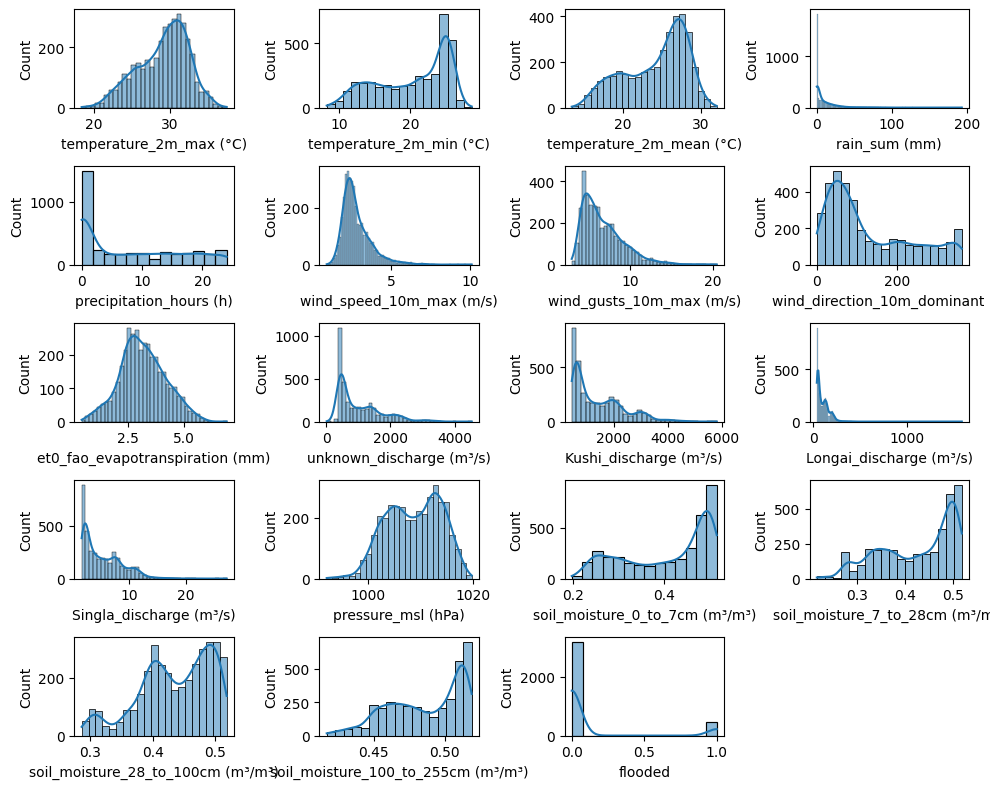

In [13]:
num_rows = 5
num_cols = 4

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()


for i, col in enumerate(df):
    # Create a histogram plot with KDE
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_xlabel(col)


fig.delaxes(axes[19])

# Adjust layout
plt.tight_layout()

#Save plot as jpg
plot_path = "pair_plot.png"
plt.savefig(plot_path)

# Show the plots
plt.show()

## Boxplot Analysis

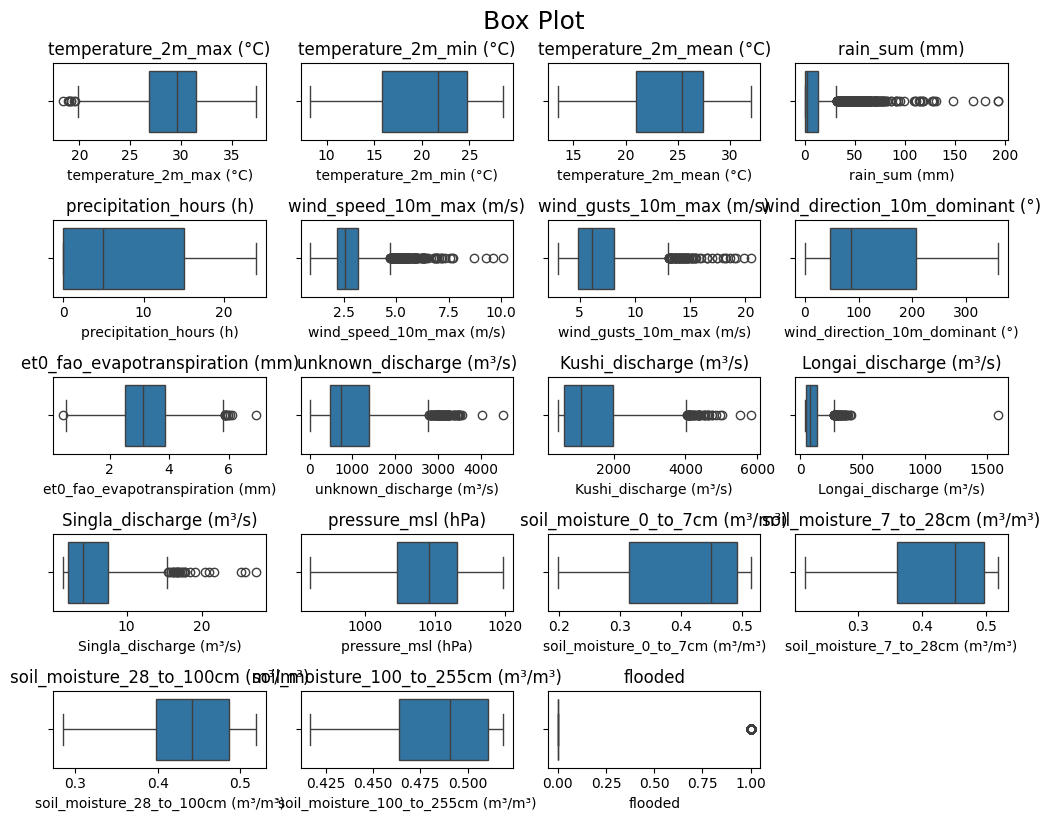

In [14]:
num_rows = 5
num_columns = 4

fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()



for i, column in enumerate(df):
    sns.boxplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'{column}')

# Hide any unused subplots
# for i in range(len(df), num_rows*num_columns):
fig.delaxes(axes[19])

plt.tight_layout()
plt.suptitle("Box Plot", y=1.02, fontsize=18)

#Save plot as png
plot_path = "box_plot.png"
plt.savefig(plot_path)

plt.show()

## Correlation Analysis

In [15]:
df_corr = df.corr(method='pearson')
df_corr= df_corr.applymap("{:.2f}".format)
df_corr.T

,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),rain_sum (mm),precipitation_hours (h),wind_speed_10m_max (m/s),wind_gusts_10m_max (m/s),wind_direction_10m_dominant (°),et0_fao_evapotranspiration (mm),unknown_discharge (m³/s),Kushi_discharge (m³/s),Longai_discharge (m³/s),Singla_discharge (m³/s),pressure_msl (hPa),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),flooded
temperature_2m_max (°C),1.00,0.77,0.91,0.05,0.20,0.16,0.19,0.20,0.71,0.34,0.37,0.33,0.37,-0.66,0.35,0.37,0.34,0.33,0.20
temperature_2m_min (°C),0.77,1.00,0.96,0.39,0.66,0.15,0.39,0.15,0.27,0.58,0.63,0.58,0.65,-0.86,0.74,0.73,0.65,0.60,0.32
temperature_2m_mean (°C),0.91,0.96,1.00,0.26,0.49,0.15,0.32,0.18,0.48,0.52,0.56,0.51,0.57,-0.82,0.61,0.61,0.54,0.52,0.28
rain_sum (mm),0.05,0.39,0.26,1.00,0.69,0.34,0.51,-0.00,-0.32,0.24,0.29,0.31,0.36,-0.44,0.48,0.46,0.40,0.32,0.22
precipitation_hours (h),0.20,0.66,0.49,0.69,1.00,0.23,0.54,0.08,-0.29,0.44,0.49,0.46,0.54,-0.64,0.73,0.69,0.58,0.49,0.32
wind_speed_10m_max (m/s),0.16,0.15,0.15,0.34,0.23,1.00,0.68,0.13,0.05,-0.08,-0.06,-0.03,-0.03,-0.25,0.12,0.10,0.06,-0.04,0.10
wind_gusts_10m_max (m/s),0.19,0.39,0.32,0.51,0.54,0.68,1.00,0.04,-0.06,0.04,0.08,0.10,0.13,-0.44,0.40,0.33,0.23,0.05,0.19
wind_direction_10m_dominant (°),0.20,0.15,0.18,-0.00,0.08,0.13,0.04,1.00,0.21,0.05,0.05,0.05,0.06,-0.16,0.04,0.04,0.04,0.02,0.05
et0_fao_evapotranspiration (mm),0.71,0.27,0.48,-0.32,-0.29,0.05,-0.06,0.21,1.00,-0.02,-0.01,-0.02,-0.01,-0.24,-0.07,-0.05,-0.06,-0.04,0.03
unknown_discharge (m³/s),0.34,0.58,0.52,0.24,0.44,-0.08,0.04,0.05,-0.02,1.00,0.99,0.87,0.91,-0.51,0.48,0.52,0.52,0.69,0.18


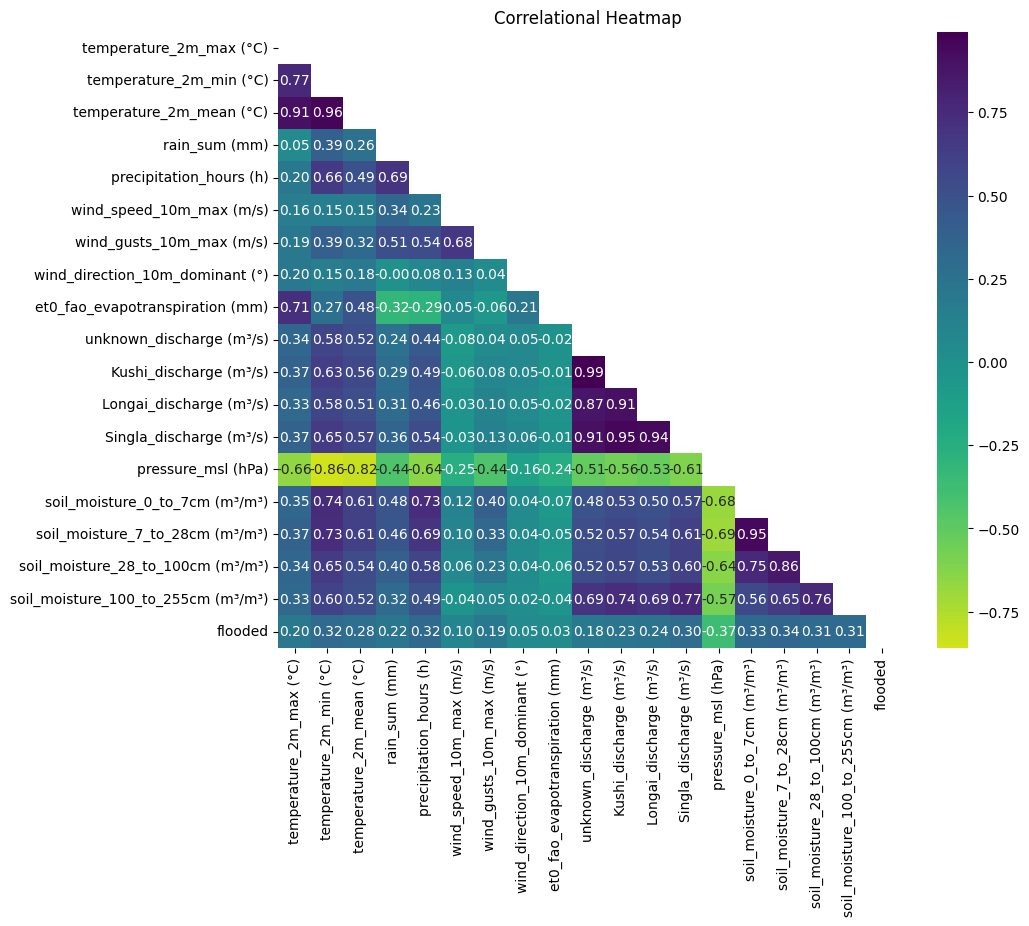

In [16]:
plt.figure(figsize=(10, 8))
mask = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, cmap='viridis_r', center=0, mask=mask, fmt=".2f")
plt.xticks(rotation = 90)
plt.title('Correlational Heatmap')

#Save plot as png
plot_path = "corr_plot.png"
plt.savefig(plot_path)
plt.show()

In [17]:
# Strongest Positive Correlated Features

df_corr = df.corr(method='pearson')

# Threshold for high correlation
threshold = 0.80

# Extract the pairs of features with correlation values greater than the threshold
corr_pairs = df_corr.unstack()
high_corr = corr_pairs[(corr_pairs > threshold) & (corr_pairs < 1)]

# Drop duplicate pairs by sorting the index and dropping duplicates
high_corr = high_corr.reset_index()
high_corr.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr = high_corr.drop_duplicates(subset=['Correlation'])

# Sort by correlation value in descending order
high_corr = high_corr.sort_values(by='Correlation', ascending=False)

# Display the pairs
high_corr

,Feature1,Feature2,Correlation
4,unknown_discharge (m³/s),Kushi_discharge (m³/s),0.991719
1,temperature_2m_min (°C),temperature_2m_mean (°C),0.958794
9,Kushi_discharge (m³/s),Singla_discharge (m³/s),0.951603
16,soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),0.945590
12,Longai_discharge (m³/s),Singla_discharge (m³/s),0.937195
6,unknown_discharge (m³/s),Singla_discharge (m³/s),0.911278
8,Kushi_discharge (m³/s),Longai_discharge (m³/s),0.907565
0,temperature_2m_max (°C),temperature_2m_mean (°C),0.905047
5,unknown_discharge (m³/s),Longai_discharge (m³/s),0.872298
18,soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),0.858629


In [18]:
# Strongest Negative Correlated Features

# Set the threshold for the negative correlation value
threshold = -0.5

# Extract the pairs of features with correlation values between -1 and the threshold
neg_corr_pairs = df_corr.unstack()
high_neg_corr = neg_corr_pairs[(neg_corr_pairs < threshold) & (neg_corr_pairs > -1)]

# Drop duplicate pairs by sorting the index and dropping duplicates
high_neg_corr = high_neg_corr.reset_index()
high_neg_corr.columns = ['Feature1', 'Feature2', 'Correlation']
high_neg_corr = high_neg_corr.drop_duplicates(subset=['Correlation'])

# Filter out self-correlations
high_neg_corr = high_neg_corr[high_neg_corr['Feature1'] != high_neg_corr['Feature2']]

# Sort by correlation value in ascending order
high_neg_corr = high_neg_corr.sort_values(by='Correlation')

# Display the pairs
high_neg_corr

,Feature1,Feature2,Correlation
1,temperature_2m_min (°C),pressure_msl (hPa),-0.858222
2,temperature_2m_mean (°C),pressure_msl (hPa),-0.820842
17,pressure_msl (hPa),soil_moisture_7_to_28cm (m³/m³),-0.694662
16,pressure_msl (hPa),soil_moisture_0_to_7cm (m³/m³),-0.683415
0,temperature_2m_max (°C),pressure_msl (hPa),-0.658201
3,precipitation_hours (h),pressure_msl (hPa),-0.642510
18,pressure_msl (hPa),soil_moisture_28_to_100cm (m³/m³),-0.635212
7,Singla_discharge (m³/s),pressure_msl (hPa),-0.611522
19,pressure_msl (hPa),soil_moisture_100_to_255cm (m³/m³),-0.573872
5,Kushi_discharge (m³/s),pressure_msl (hPa),-0.562477


In [19]:
# Year and Month deature engineering
df['month'] = df.index.month
df['year'] = df.index.year


In [20]:
# droping columns due to high collinearity

col_to_drop = ['unknown_discharge (m³/s)',
               'temperature_2m_min (°C)',
               'temperature_2m_max (°C)',
               'precipitation_hours (h)',
               'Kushi_discharge (m³/s)',
               'Singla_discharge (m³/s)',
               'soil_moisture_7_to_28cm (m³/m³)',
               'soil_moisture_28_to_100cm (m³/m³)',
               'soil_moisture_0_to_7cm (m³/m³)',
               'temperature_2m_mean (°C)']

new_df = df.drop(col_to_drop, axis=1)
print(new_df.shape)
new_df.head()

(3654, 11)


,rain_sum (mm),wind_speed_10m_max (m/s),wind_gusts_10m_max (m/s),wind_direction_10m_dominant (°),et0_fao_evapotranspiration (mm),Longai_discharge (m³/s),pressure_msl (hPa),soil_moisture_100_to_255cm (m³/m³),flooded,month,year
Date,,,,,,,,,,,
2015-01-01,1.2,1.43,3.8,65,1.73,46.64,1015.7,0.456,0,1,2015
2015-01-02,0.0,1.88,5.0,28,2.76,46.42,1015.9,0.455,0,1,2015
2015-01-03,0.0,1.96,4.6,22,2.69,46.21,1014.7,0.455,0,1,2015
2015-01-04,4.7,3.24,7.6,285,2.21,46.21,1012.5,0.455,0,1,2015
2015-01-05,0.2,3.28,8.4,293,2.37,46.10,1013.1,0.454,0,1,2015


In [21]:
new_df.to_csv('Data_After_EDA.csv', index='Date')

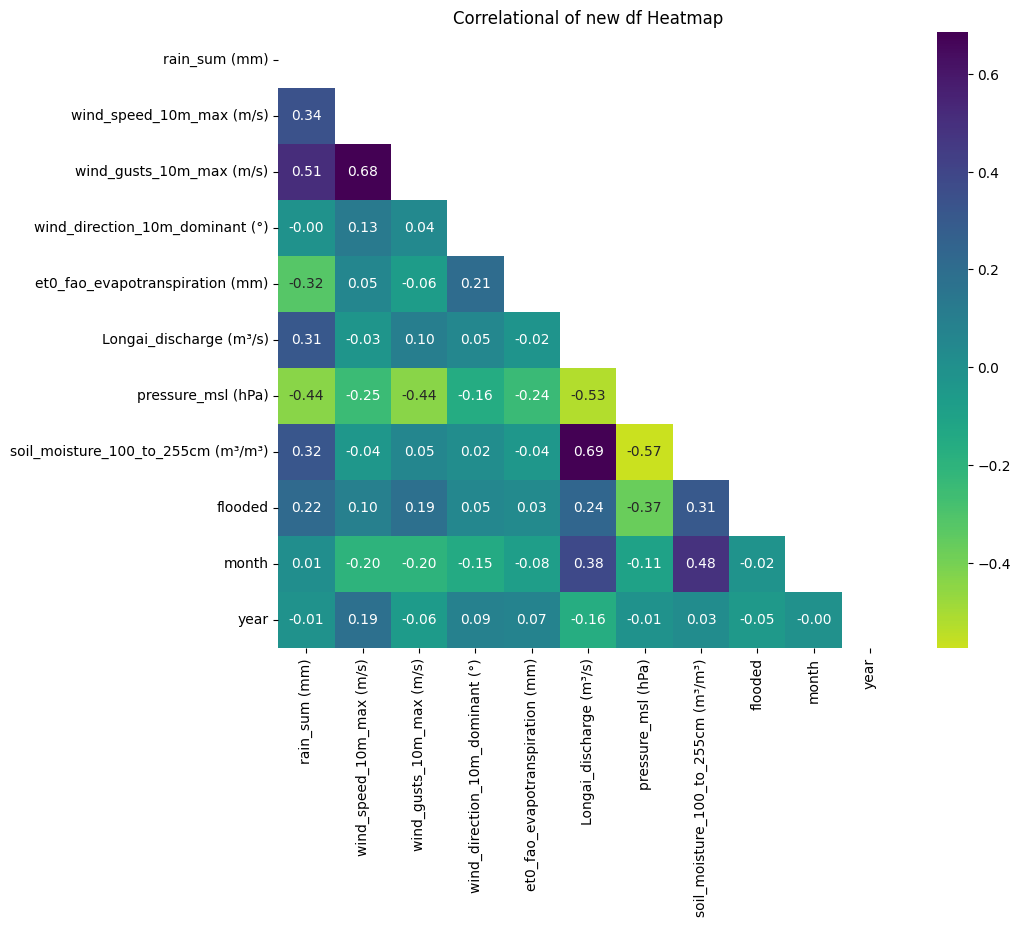

In [22]:
plt.figure(figsize=(10, 8))
mask = np.triu(new_df.corr())
sns.heatmap(new_df.corr(), annot=True, cmap='viridis_r', center=0, mask=mask, fmt=".2f")
plt.xticks(rotation = 90)
plt.title('Correlational of new df Heatmap')

#Save plot as png
plot_path = "corr_plot2.png"
plt.savefig(plot_path)
plt.show()

In [23]:
target_vector = ['rain_sum (mm)', 'soil_moisture_100_to_255cm (m³/m³)', 'Longai_discharge (m³/s)']
target_col_yearly = new_df[target_vector].groupby(new_df.index.year).mean()
target_col_monthly = new_df[target_vector].groupby([new_df.index.month]).mean()
target_col_yr_mnth = new_df.resample('M').sum()

In [24]:
# Yearly and monthly rainfall

default_colors = pc.qualitative.Plotly

# Create a color mapping
sub_regions = target_vector
color_map = {sub_region: default_colors[i % len(default_colors)] for i, sub_region in enumerate(sub_regions)}

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=[
    'rain_sum (mm/day) by Year',
    'rain_sum (mm/day) by Month'])

# First plot: Yearly Rainfall

fig.add_trace(go.Scatter(
  x=target_col_yearly.index,
  y=target_col_yearly['rain_sum (mm)'],
  mode='lines+markers',
  name= 'rain_sum',
  line=dict(color=color_map['rain_sum (mm)'])
), row=1, col=1)

# Second plot: Monthly Rainfall


fig.add_trace(go.Scatter(
    x=target_col_monthly.index,
    y=target_col_monthly['rain_sum (mm)'],
    mode='lines+markers',
    name='rain_sum',
    line=dict(color=color_map['rain_sum (mm)']),
    showlegend=('rain_sum' not in color_map)  # Prevent duplicate legends
), row=1, col=2)

# Update layout
fig.update_layout(
    title_text="Yearly & Monthly Rainfall",
    template='plotly_dark',
    showlegend=False,
    xaxis=dict(title="Year", dtick=2),   # Show every 2nd year
    xaxis2=dict(title="Month", dtick=2)  # Show every 2nd month
)



fig.show()

In [25]:
# Seasonality and Trendp: Rainfall
fig = px.line(target_col_yr_mnth, x=target_col_yr_mnth.index, y=target_col_yr_mnth['rain_sum (mm)'], title='Rain Trends Over Year-Month',)

fig.update_layout(template='plotly_dark', xaxis_tickangle=-45, showlegend=False, width=900)
fig.show()

In [26]:
# Yearly & Monthly Soil Moisture

default_colors = pc.qualitative.Plotly

# Create a color mapping
sub_regions = target_vector
color_map = {sub_region: default_colors[i % len(default_colors)] for i, sub_region in enumerate(sub_regions)}

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=[
    'soil_moisture_100_to_255cm (m³/m³) by Year',
    'soil_moisture_100_to_255cm (m³/m³) by Month'])

# First plot: YearlySoil Moisture

fig.add_trace(go.Scatter(
  x=target_col_yearly.index,
  y=target_col_yearly['soil_moisture_100_to_255cm (m³/m³)'],
  mode='lines+markers',
  name= 'soil_moisture_100_to_255cm',
  line=dict(color=color_map['soil_moisture_100_to_255cm (m³/m³)'])
), row=1, col=1)

# Second plot: Monthly Soil Moisture


fig.add_trace(go.Scatter(
    x=target_col_monthly.index,
    y=target_col_monthly['soil_moisture_100_to_255cm (m³/m³)'],
    mode='lines+markers',
    name='soil_moisture_100_to_255cm',
    line=dict(color=color_map['soil_moisture_100_to_255cm (m³/m³)']),
    showlegend=('rain_sum' not in color_map)  # Prevent duplicate legends
), row=1, col=2)

# Update layout
fig.update_layout(
    title_text="Soil_moisture_100_to_255cm (m³/m³) Trends: Yearly & Monthly",
    template='plotly_dark',
    showlegend=False,
    xaxis=dict(title="Year", dtick=2),   # Show every 2nd year
    xaxis2=dict(title="Month", dtick=2)  # Show every 2nd month
)

fig.show()

In [27]:
# Soil_moisture Seasonality and Trend
fig = px.line(target_col_yr_mnth, x=target_col_yr_mnth.index, y=target_col_yr_mnth['soil_moisture_100_to_255cm (m³/m³)'], title='Soil_moisture Trends Over Year-Month',)

fig.update_layout(template='plotly_dark', xaxis_tickangle=-45, showlegend=False, width=900)
fig.show()

In [28]:
# Longai_discharge (m³/s) yearly and monthly:

default_colors = pc.qualitative.Plotly

# Create a color mapping for SUB_REGION
sub_regions = target_vector
color_map = {sub_region: default_colors[i % len(default_colors)] for i, sub_region in enumerate(sub_regions)}

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=[
    'Longai_discharge (m³/s) by Year',
    'Longai_discharge (m³/s) by Month'])

# First plot: Longai_discharge (m³/s) yearly

fig.add_trace(go.Scatter(
  x=target_col_yearly.index,
  y=target_col_yearly['Longai_discharge (m³/s)'],
  mode='lines+markers',
  name= 'Longai_discharge',
  line=dict(color=color_map['Longai_discharge (m³/s)'])
), row=1, col=1)

# Second plot: Longai_discharge (m³/s) monthly


fig.add_trace(go.Scatter(
    x=target_col_monthly.index,
    y=target_col_monthly['Longai_discharge (m³/s)'],
    mode='lines+markers',
    name='Longai_discharge',
    line=dict(color=color_map['Longai_discharge (m³/s)']),
    showlegend=('Longai_discharge (m³/s)' not in color_map)  # Prevent duplicate legends
), row=1, col=2)

# Update layout
fig.update_layout(
    title_text="Longai_discharge (m³/s) Trends: Yearly & Monthly",
    template='plotly_dark',
    showlegend=False,
    xaxis=dict(title="Year", dtick=2),   # Show every 2nd year
    xaxis2=dict(title="Month", dtick=2)  # Show every 2nd month
)

fig.show()

In [29]:
# Seasonality and Trend
fig = px.line(target_col_yr_mnth, x=target_col_yr_mnth.index, y=target_col_yr_mnth['Longai_discharge (m³/s)'], title='Longai_discharge Trends Over Year-Month',)

fig.update_layout(template='plotly_dark', xaxis_tickangle=-45, showlegend=False, width=900)
fig.show()

In [33]:
cls_count = df['flooded'].value_counts(normalize=True)
cls_count = pd.DataFrame(cls_count).reset_index()
cls_count.columns = ['flooded', 'count']
print(cls_count)

   flooded     count
0        0  0.874932
1        1  0.125068


In [34]:
fig = px.pie(cls_count, values='count', names='flooded', title='Flooded Distribution', )
fig.update_layout(template='plotly_dark')
fig.show()